# Import packages and datasets

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales_train_val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales_train_validation.csv')

# Filter test data

In [4]:
sales_train_val

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [7]:
list_cols_drop = ['d_{0}'.format(i) for i in range(1900, 1914)]

In [8]:
sales_train_val = sales_train_val.drop(columns=list_cols_drop)

In [9]:
sales_train_val

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,4,2,3,0,1,2
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,3,1,2,1,3,1,0,2,5,4
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,4,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,1,1,2,0,0,0,0,1,1
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,1,1,2,1,4,0,0,2,2
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,1,2,1,1,1,1,2


# Get sales data of Household in California stores

In [12]:
df_ca_household = sales_train_val[(sales_train_val['state_id'] == 'CA') & (sales_train_val['cat_id'] == 'HOUSEHOLD')]

In [13]:
df_ca_category = df_ca_household.copy()

df_ca_category.drop(['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], axis = 1, inplace=True)
df_ca_category = pd.melt(df_ca_category, id_vars=['id'])
df_ca_category['Date'] = df_ca_category['variable'].str[2:].astype('int')

dict_date = {}
for i in range(1, 1914):
    dict_date.update({i: (pd.to_datetime('28/01/2011', format='%d/%m/%Y') + pd.to_timedelta(i, unit='D'))})
    
df_ca_category['Date'] = df_ca_category['Date'].map(dict_date)

df_ca_category = df_ca_category[['Date', 'id', 'value']]

In [14]:
df_ca_category

,Date,id,value
0,2011-01-29,HOUSEHOLD_1_001_CA_1_validation,3
1,2011-01-29,HOUSEHOLD_1_002_CA_1_validation,1
2,2011-01-29,HOUSEHOLD_1_003_CA_1_validation,0
3,2011-01-29,HOUSEHOLD_1_004_CA_1_validation,4
4,2011-01-29,HOUSEHOLD_1_005_CA_1_validation,0
...,...,...,...
7953007,2016-04-10,HOUSEHOLD_2_512_CA_4_validation,1
7953008,2016-04-10,HOUSEHOLD_2_513_CA_4_validation,0
7953009,2016-04-10,HOUSEHOLD_2_514_CA_4_validation,1
7953010,2016-04-10,HOUSEHOLD_2_515_CA_4_validation,0


# Coefficient of Variance Squared (CV2)

In [15]:
df_ca_category_1 = df_ca_category[df_ca_category['value'] != 0]

In [16]:
cv_data = df_ca_category_1.groupby('id').agg(average=('value','mean'),
                                 sd=('value','std')).reset_index()

cv_data['cv_sqr'] = (cv_data['sd'] / cv_data['average'])**2

In [17]:
cv_data

,id,average,sd,cv_sqr
0,HOUSEHOLD_1_001_CA_1_validation,1.287671,0.578559,0.201876
1,HOUSEHOLD_1_001_CA_2_validation,1.508711,0.792730,0.276082
2,HOUSEHOLD_1_001_CA_3_validation,1.587372,0.937025,0.348454
3,HOUSEHOLD_1_001_CA_4_validation,1.283019,0.579699,0.204145
4,HOUSEHOLD_1_002_CA_1_validation,1.364583,0.724359,0.281778
...,...,...,...,...
4183,HOUSEHOLD_2_515_CA_4_validation,1.152778,0.433126,0.141168
4184,HOUSEHOLD_2_516_CA_1_validation,1.121429,0.378032,0.113636
4185,HOUSEHOLD_2_516_CA_2_validation,1.193750,0.475043,0.158358
4186,HOUSEHOLD_2_516_CA_3_validation,1.102362,0.340533,0.095427


# Average Demand Interval (ADI) per Product

In [18]:
prod_by_date = df_ca_category_1.groupby(['id','Date']).agg(count=('id','count')).reset_index()
skus = prod_by_date.id.value_counts()

In [19]:
from timeit import default_timer as timer
start = timer()

list_adi = list()
for i in range(len(skus.index)):
    a = prod_by_date[prod_by_date['id']==skus.index[i]]
    a['Previous_Date'] = a['Date'].shift(1)
    a['Duration'] = (a['Date'] - a['Previous_Date']).dt.days
    mean_temp = a.Duration.mean()
    list_adi.append([skus.index[i], mean_temp])

end = timer()
print('This line of code took {} minutes'.format((end-start) / 60))

This line of code took 12.910343041150002 minutes


In [33]:
list_adi[:5]

[['HOUSEHOLD_1_198_CA_3_validation', 1.0388615216201422],
 ['HOUSEHOLD_1_373_CA_1_validation', 1.0615212527964206],
 ['HOUSEHOLD_1_072_CA_3_validation', 1.041969781757135],
 ['HOUSEHOLD_1_498_CA_3_validation', 1.062219730941704],
 ['HOUSEHOLD_1_118_CA_3_validation', 1.0662921348314607]]

In [21]:
ADI_df = pd.DataFrame(list_adi, columns=['id', 'ADI'])

In [22]:
ADI_df

,id,ADI
0,HOUSEHOLD_1_198_CA_3_validation,1.038862
1,HOUSEHOLD_1_373_CA_1_validation,1.061521
2,HOUSEHOLD_1_072_CA_3_validation,1.041970
3,HOUSEHOLD_1_498_CA_3_validation,1.062220
4,HOUSEHOLD_1_118_CA_3_validation,1.066292
...,...,...
4183,HOUSEHOLD_2_216_CA_4_validation,37.230769
4184,HOUSEHOLD_1_073_CA_3_validation,28.909091
4185,HOUSEHOLD_1_336_CA_3_validation,153.222222
4186,HOUSEHOLD_1_400_CA_4_validation,7.714286


# MERGE CV2 AND ADI DATA

In [23]:
adi_cv = pd.merge(cv_data, ADI_df, on = 'id', how = 'inner')

In [24]:
adi_cv.isnull().sum()

id         0
average    0
sd         0
cv_sqr     0
ADI        0
dtype: int64

In [25]:
adi_cv

,id,average,sd,cv_sqr,ADI
0,HOUSEHOLD_1_001_CA_1_validation,1.287671,0.578559,0.201876,3.717647
1,HOUSEHOLD_1_001_CA_2_validation,1.508711,0.792730,0.276082,6.625874
2,HOUSEHOLD_1_001_CA_3_validation,1.587372,0.937025,0.348454,2.666176
3,HOUSEHOLD_1_001_CA_4_validation,1.283019,0.579699,0.204145,5.987382
4,HOUSEHOLD_1_002_CA_1_validation,1.364583,0.724359,0.281778,4.825065
...,...,...,...,...,...
4183,HOUSEHOLD_2_515_CA_4_validation,1.152778,0.433126,0.141168,11.408451
4184,HOUSEHOLD_2_516_CA_1_validation,1.121429,0.378032,0.113636,6.795699
4185,HOUSEHOLD_2_516_CA_2_validation,1.193750,0.475043,0.158358,5.921630
4186,HOUSEHOLD_2_516_CA_3_validation,1.102362,0.340533,0.095427,7.442688


In [26]:
adi_cv.to_csv('ADI_CV_5_Year.csv')

In [27]:
def category(df):
    a=0

    if((df['ADI']<=1.32) & (df['cv_sqr']<=0.49)):
        a='Smooth'
    if((df['ADI']>=1.32) & (df['cv_sqr']>=0.49)):  
        a='Lumpy'
    if((df['ADI']<1.32) & (df['cv_sqr']>0.49)):
        a='Erratic'
    if((df['ADI']>1.32) & (df['cv_sqr']<0.49)):
        a='Intermittent'
    return a

In [28]:
adi_cv['category']=adi_cv.apply(category,axis=1)

In [29]:
adi_cv

,id,average,sd,cv_sqr,ADI,category
0,HOUSEHOLD_1_001_CA_1_validation,1.287671,0.578559,0.201876,3.717647,Intermittent
1,HOUSEHOLD_1_001_CA_2_validation,1.508711,0.792730,0.276082,6.625874,Intermittent
2,HOUSEHOLD_1_001_CA_3_validation,1.587372,0.937025,0.348454,2.666176,Intermittent
3,HOUSEHOLD_1_001_CA_4_validation,1.283019,0.579699,0.204145,5.987382,Intermittent
4,HOUSEHOLD_1_002_CA_1_validation,1.364583,0.724359,0.281778,4.825065,Intermittent
...,...,...,...,...,...,...
4183,HOUSEHOLD_2_515_CA_4_validation,1.152778,0.433126,0.141168,11.408451,Intermittent
4184,HOUSEHOLD_2_516_CA_1_validation,1.121429,0.378032,0.113636,6.795699,Intermittent
4185,HOUSEHOLD_2_516_CA_2_validation,1.193750,0.475043,0.158358,5.921630,Intermittent
4186,HOUSEHOLD_2_516_CA_3_validation,1.102362,0.340533,0.095427,7.442688,Intermittent


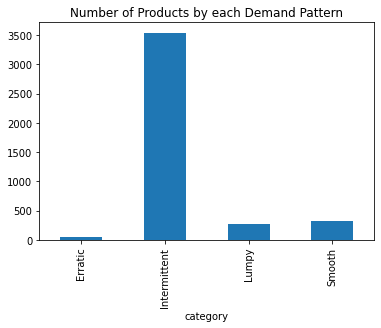

In [30]:
adi_cv.groupby('category')['id'].count().plot(kind='bar')
plt.title('Number of Products by each Demand Pattern')
plt.show()

In [31]:
list_intermittent = adi_cv[adi_cv['category'] == 'Intermittent']['id'].unique().tolist()
list_lumpy = adi_cv[adi_cv['category'] == 'Lumpy']['id'].unique().tolist()
list_smooth = adi_cv[adi_cv['category'] == 'Smooth']['id'].unique().tolist()
list_erratic = adi_cv[adi_cv['category'] == 'Erratic']['id'].unique().tolist()

In [32]:
pd.Series(list_intermittent).to_csv('Intermittent_ID_5_Year_Data.csv')
pd.Series(list_lumpy).to_csv('Lumpy_ID_5_Year_Data.csv')
pd.Series(list_smooth).to_csv('Smooth_ID_5_Year_Data.csv')
pd.Series(list_erratic).to_csv('Erratic_ID_5_Year_Data.csv')